# PREDICTION OF CAR PRICES 

In [818]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### importing the needed libraries

In [819]:
df=pd.read_csv('cars_engage_2022.csv') #uploading the dataset and storing it in a dataframe

In [820]:
df      ##creating copies of the dataframe
df2=df['Ex-Showroom_Price']
df3=df

In [821]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [822]:
#creating a list of categorical columns so we can label encode them later and a list of columns we need to fit to predict data
cat_col=['Make','Drivetrain','Cylinder_Configuration','Emission_Norm','Engine_Location','Fuel_Type','Fuel_System','Body_Type','Front_Brakes','Rear_Brakes','Front_Suspension',
'Rear_Suspension','Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Power_Steering',
'Power_Windows','Power_Seats','Keyless_Entry','Power','Torque','Odometer',
'Speedometer','Tachometer','Tripmeter','Seats_Material','Type','Wheels_Size',
'Start_/_Stop_Button','12v_Power_Outlet','Audiosystem','Aux-in_Compatibility',
'Average_Fuel_Consumption','Basic_Warranty','Bluetooth','Boot-lid_Opener','CD_/_MP3_/_DVD_Player',
'Central_Locking','Child_Safety_Locks','Clock','Cup_Holders','Distance_to_Empty',
'Door_Pockets','Engine_Malfunction_Light','Extended_Warranty','FM_Radio','Fuel-lid_Opener',
'Fuel_Gauge','Handbrake','Instrument_Console','Low_Fuel_Warning','Multifunction_Display',
'Sun_Visor','Third_Row_AC_Vents','Ventilation_System','Drive_Modes','Auto-Dimming_Rear-View_Mirror','Hill_Assist','Gear_Indicator',               '3_Point_Seat-Belt_in_Middle_Rear_Seat','Ambient_Lightning','Cargo/Boot_Lights','Drive_Modes','Engine_Immobilizer',
  'High_Speed_Alert_System','Lane_Watch_Camera/_Side_Mirror_Camera',
'Passenger_Side_Seat-Belt_Reminder','Seat_Back_Pockets','Voice_Recognition',
'Walk_Away_Auto_Car_Lock','ABS_(Anti-lock_Braking_System)','Headlight_Reminder','Adjustable_Headrests',
     'Gross_Vehicle_Weight','Airbags','Door_Ajar_Warning','EBD_(Electronic_Brake-force_Distribution)','Fasten_Seat_Belt_Warning','Gear_Shift_Reminder','Adjustable_Steering_Column','Other_Specs',
'Parking_Assistance','Key_Off_Reminder','USB_Compatibility','Android_Auto','Apple_CarPlay',
'Cigarette_Lighter','Infotainment_Screen','Multifunction_Steering_Wheel','Average_Speed',
  'EBA_(Electronic_Brake_Assist)','Seat_Height_Adjustment','Navigation_System','Second_Row_AC_Vents',""               'Tyre_Pressure_Monitoring_System','Rear_Center_Armrest','iPod_Compatibility','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box','Heated_Seats','Turbocharger','ISOFIX_(Child-Seat_Mount)','Rain_Sensing_Wipers',
'Paddle_Shifters','Leather_Wrapped_Steering','Automatic_Headlamps','Engine_Type','ASR_/_Traction_Control',
'Cruise_Control','Heads-Up_Display','Welcome_Lights']  
pred_col= ['Make','Model','Variant','Drivetrain','Cylinder_Configuration','Emission_Norm','Engine_Location','Fuel_System','Fuel_Type','Body_Type',
'Front_Brakes','Rear_Brakes','Front_Suspension','Rear_Suspension',
'Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Power_Steering','Power_Windows','Power','Torque','Odometer','Speedometer','Tachometer','Seats_Material','Type','Wheels_Size',
'Audiosystem','Basic_Warranty','Boot-lid_Opener','Clock','Cup_Holders','Door_Pockets',
'Extended_Warranty','Fuel-lid_Opener','Fuel_Gauge','Handbrake','Instrument_Console','Sun_Visor',
'Third_Row_AC_Vents','Ventilation_System','Adjustable_Headrests','Airbags','Adjustable_Steering_Column',
'Other_Specs','Other_specs','Parking_Assistance','Infotainment_Screen','Multifunction_Steering_Wheel',
'Seat_Height_Adjustment','Rear_Center_Armrest','Recommended_Tyre_Pressure','Heated_Seats','Engine_Type','Drive_Modes']
         

In [928]:
units={'mm_col':  ['Height','Length','Width','Ground_Clearance','Front_Track','Rear_Track','Wheelbase'],
'litre_col': ['Fuel_Tank_Capacity','Boot_Space'],
'km_per_litre_col':['City_Mileage','Highway_Mileage','ARAI_Certified_Mileage'],
'kilogram_col':['Kerb_Weight','Gross_Vehicle_Weight'],
'dim_less_col':['Gears','Compression_Ratio','USB_Ports']
}

## cleaning data by filling in the missing values

In [824]:
for col in cat_col:
 df3[col]=df3[col].fillna('unknown')

In [825]:
mean_col=['Cylinders','Valves_Per_Cylinder','Fuel_Tank_Capacity',
'Height','Width','City_Mileage','Highway_Mileage','ARAI_Certified_Mileage','ARAI_Certified_Mileage_for_CNG','Kerb_Weight','Gears','Ground_Clearance',
'Front_Track','Rear_Track','Wheelbase',
'Boot_Space','Minimum_Turning_Radius','Gross_Vehicle_Weight',
'Compression_Ratio','USB_Ports','Battery','Electric_Range','Ex-Showroom_Price','Displacement'
]
median_col=['Cylinders','Doors','Seating_Capacity','Number_of_Airbags' ]

## Cleaning data by removing the units and converting string type data to numeric type 

In [826]:
for col in units['mm_col']:
  df3[col]=df3[col].str.replace("mm","")
  df3[col]=pd.to_numeric(df3[col],errors='coerce')
for col in units['litre_col']:
  df3[col]=df3[col].str.replace("litres","")
  df3[col]=pd.to_numeric(df3[col],errors='coerce')    
for col in units['km_per_litre_col']:
  df3[col]=df3[col].str.replace("km/litre","")
  df3[col]=pd.to_numeric(df3[col],errors='coerce')
for col in units['kilogram_col']:
  df3[col]=df3[col].str.replace("kg","")
  df3[col]=pd.to_numeric(df[col],errors='coerce')
for col in units['dim_less_col']:
  df3[col]=pd.to_numeric(df3[col],errors='coerce')
df3['Ex-Showroom_Price']=df3['Ex-Showroom_Price'].str.replace("Rs.","").str.replace(",","")
df3['Ex-Showroom_Price']=pd.to_numeric(df3['Ex-Showroom_Price'],errors='coerce')
df3['Displacement']=df3['Displacement'].str.replace("cc","")
df3['Displacement']=pd.to_numeric(df3['Displacement'],errors='coerce')
df3['ARAI_Certified_Mileage_for_CNG']=df3['ARAI_Certified_Mileage_for_CNG'].str.replace("km/kg","")
df3['ARAI_Certified_Mileage_for_CNG']=pd.to_numeric(df3['ARAI_Certified_Mileage_for_CNG'],errors='coerce')
df3['Minimum_Turning_Radius']=df3['Minimum_Turning_Radius'].str.replace("meter","")
df3['Minimum_Turning_Radius']=pd.to_numeric(df3['Minimum_Turning_Radius'],errors='coerce')
df3['Electric_Range']=df3['Electric_Range'].str.replace("km/full charge","")
df3['Electric_Range']=pd.to_numeric(df3['Electric_Range'],errors='coerce')
df3['Battery']=df3['Battery'].str.replace("ampere-hour","").str.replace("kWh,Battery Placed Under Rear Seats","").str.replace("(kWh), Lithium Ion","").str.replace(" kWh* Advanced Li-ion polymer, liquid cooled battery pack with IP67 certification","").str.replace("","").str.replace("(kWh), Lithium Ion","")
df3['Battery']=pd.to_numeric(df3['Battery'],errors='coerce')


C:\Users\abbas\AppData\Local\Temp/ipykernel_372528/2003890869.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['Ex-Showroom_Price']=df3['Ex-Showroom_Price'].str.replace("Rs.","").str.replace(",","")
C:\Users\abbas\AppData\Local\Temp/ipykernel_372528/2003890869.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['Battery']=df3['Battery'].str.replace("ampere-hour","").str.replace("kWh,Battery Placed Under Rear Seats","").str.replace("(kWh), Lithium Ion","").str.replace(" kWh* Advanced Li-ion polymer, liquid cooled battery pack with IP67 certification","").str.replace("","").str.replace("(kWh), Lithium Ion","")


In [827]:
#replacing the missing values for numeric columns by either mean or median of their values
for col in mean_col:
  df3[col]=df[col].fillna(df3[col].mean())
for col in median_col:
  df3[col]=df3[col].fillna(df3[col].median())

In [828]:
lab_col=['Tripmeter','Start_/_Stop_Button','12v_Power_Outlet','Aux-in_Compatibility','Average_Fuel_Consumption',
'Bluetooth','CD_/_MP3_/_DVD_Player','Central_Locking',
        'Child_Safety_Locks','Distance_to_Empty','Engine_Malfunction_Light','FM_Radio','Low_Fuel_Warning','Multifunction_Display',
'Auto-Dimming_Rear-View_Mirror','Hill_Assist','Gear_Indicator','3_Point_Seat-Belt_in_Middle_Rear_Seat','Ambient_Lightning','Cargo/Boot_Lights',
'Engine_Immobilizer','High_Speed_Alert_System','Lane_Watch_Camera/_Side_Mirror_Camera',
'Passenger_Side_Seat-Belt_Reminder','Seat_Back_Pockets','Voice_Recognition',
'Walk_Away_Auto_Car_Lock','ABS_(Anti-lock_Braking_System)','Headlight_Reminder','Door_Ajar_Warning','EBD_(Electronic_Brake-force_Distribution)','Fasten_Seat_Belt_Warning','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility','Android_Auto','Apple_CarPlay',
        'Cigarette_Lighter','Average_Speed','EBA_(Electronic_Brake_Assist)','Navigation_System','Second_Row_AC_Vents',
  'Tyre_Pressure_Monitoring_System','iPod_Compatibility','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box',
'Turbocharger','ISOFIX_(Child-Seat_Mount)','Rain_Sensing_Wipers','Paddle_Shifters',
        'Leather_Wrapped_Steering','Automatic_Headlamps','ASR_/_Traction_Control','Cruise_Control',
'Heads-Up_Display','Welcome_Lights','Power_Seats','Keyless_Entry'
        ]
#list of columns to be label encoded

In [829]:
df2=df3['Ex-Showroom_Price'] #this data frame stores the training value for the variable to be predicted

In [830]:
df3= pd.get_dummies(df3,columns=pred_col)

In [831]:
le=LabelEncoder()
for col in lab_col:
  df3[col]=le.fit_transform(df3[col])

# Test train data split

In [832]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Fitting the models

In [833]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [834]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [835]:
rfr=RandomForestRegressor(n_estimators= 15, random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

## Checking accuracy of the predicted values of the various models


In [836]:
LRpred=lr.predict(x_test) #LINEAR REGRESSION MODEL

In [837]:
r2_score(y_test,LRpred)

1.0

In [838]:
#SVM MODEL

In [839]:
sr=SVR(kernel='rbf')
sr.fit(x_train,y_train)

SVR()

In [840]:
SRpred=sr.predict(x_test)
r2_score(y_test,SRpred)

-0.09075850761521109

In [841]:
#DECISION TREE MODEL

In [842]:
DTpred=dt.predict(x_test)
r2_score(y_test,DTpred)

0.7595337980804938

In [843]:
RFRpred=rfr.predict(x_test) #RANDOM FOREST MODEL
r2_score(y_test,RFRpred)

0.9265313920061158

# PLOTTING ACTUAL VS PREDICTED VALUES

## linear regression


#### scatter plot

(0.0, 30000000.0)

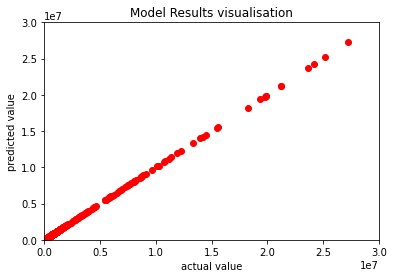

In [854]:
plt.scatter(LRpred,y_test,color='red')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Model Results visualisation')
plt.ylim(0,30000000)
plt.xlim(0,30000000)
#plt.plot(range(20000), range(20000))

# REG PLOT

(0.0, 30000000.0)

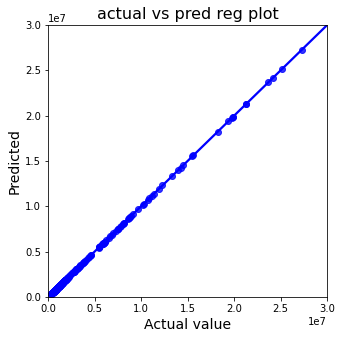

In [860]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(1)
ax.set_title("actual vs pred reg plot", fontsize=16)
ax.patch.set_alpha(0)
gax=sns.regplot(x= LRpred, y= y_test,data=col,color='b')
gax.set_ylabel('Predicted',fontsize=14 )
gax.set_xlabel('Actual value',fontsize=14)
#gax.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax.set_ylim(0,30000000)
gax.set_xlim(0,30000000)

## SVM

Text(0.5, 1.0, 'model results visualisation')

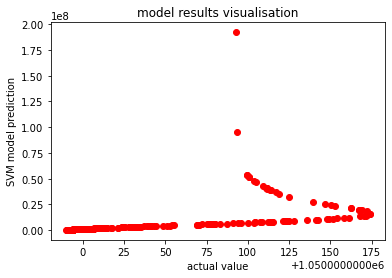

In [919]:
# scatter plot
plt.scatter(SRpred,y_test,color='red')
  
plt.xlabel('actual value')
plt.ylabel('SVM model prediction')
plt.title('model results visualisation')


(0.0, 30000000.0)

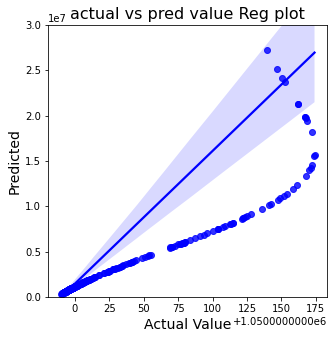

In [920]:
#reg plot
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(1)
ax.set_title("actual vs pred value Reg plot", fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot(x= SRpred, y= y_test,data=col,color='b')
gax.set_ylabel('Predicted',fontsize=14 )
gax.set_xlabel('Actual Value',fontsize=14)
#gax.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax.set_ylim(0,30000000)

Text(0.5, 1.0, 'model results visualisation')

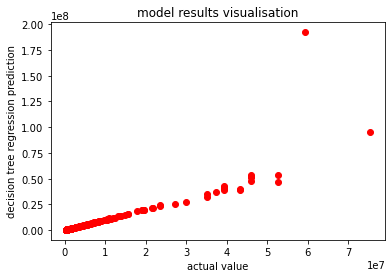

In [902]:
# DECISION TREE SCATTER PLOT
plt.scatter(DTpred,y_test,color='red')
  
plt.xlabel('actual value')
plt.ylabel('decision tree regression prediction')
plt.title('model results visualisation')
#plt.ylim(0,10000000)
#plt.xlim(0,10000000)

(0.0, 10000000.0)

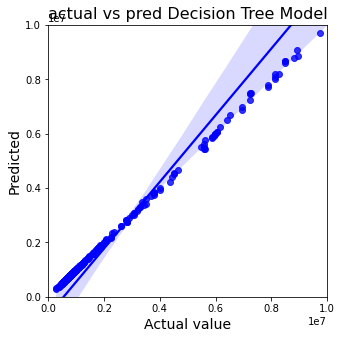

In [918]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(1)
ax.set_title("actual vs pred Decision Tree Model", fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot(x= DTpred, y= y_test,data=col,color='b')
gax.set_ylabel('Predicted',fontsize=14 )
gax.set_xlabel('Actual value',fontsize=14)
#gax.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax.set_ylim(0,10000000)
gax.set_xlim(0,10000000)

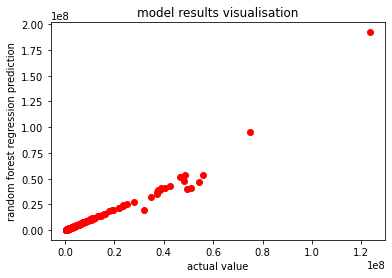

In [850]:
# Random Forest Scatter plot

plt.scatter(RFRpred,y_test,color='red')
  
plt.xlabel('actual value')
plt.ylabel('random forest regression prediction')
plt.title('model results visualisation')
plt.show()

(0.0, 100000000.0)

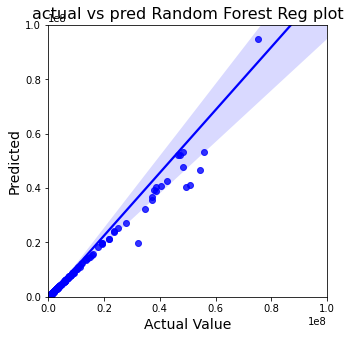

In [927]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(1)
ax.set_title("actual vs pred Random Forest Reg plot", fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot(x= RFRpred, y= y_test,data=col,color='b')
gax.set_ylabel('Predicted',fontsize=14 )
gax.set_xlabel('Actual Value',fontsize=14)
#gax.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax.set_ylim(0,100000000)
gax.set_xlim(0,100000000)